<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed Oct 23 12:33:06 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA H100 NVL                On  |   00000000:01:00.0 Off |                    0 |
| N/A   37C    P0             65W /  400W |       4MiB /  95830MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

device = "cuda" if torch.cuda.is_available() else "cpu"

2.4.1+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

train_dataset = datasets.MNIST(root="data",
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root="data",
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)
print(f"Train dataset data length: {len(train_dataset.data)}, Train dataset label length: {len(train_dataset.targets)}")
sample_image,  sample_label = train_dataset[0]
print(f"Image shape: {sample_image.shape}, Label datatype: {type(sample_label)}")
class_labels = train_dataset.classes
class_labels = [class_label.split("-")[-1].strip() for class_label in class_labels]
class_labels

Train dataset data length: 60000, Train dataset label length: 60000
Image shape: torch.Size([1, 28, 28]), Label datatype: <class 'int'>


['zero',
 'one',
 'two',
 'three',
 'four',
 'five',
 'six',
 'seven',
 'eight',
 'nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

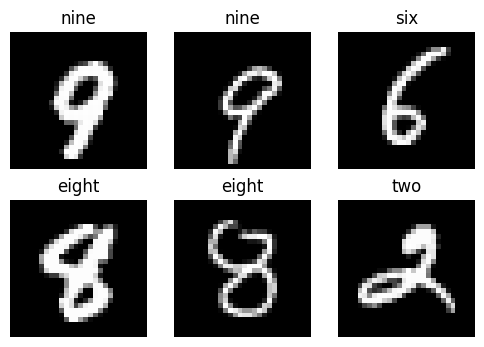

In [4]:
import random
import matplotlib.pyplot as plt


_, axs = plt.subplots(2, 3, figsize=(6, 4))
for i, (image, label) in enumerate(random.sample(list(train_dataset), k=6)):
    x = i // 3
    y = i % 3
    axs[x, y].imshow(image.squeeze(), cmap="gray")
    axs[x, y].set_title(class_labels[label])
    axs[x, y].axis("Off")

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_dataset, 
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

print(f"Length of train dataloader {len(train_dataloader)}, batch size of {BATCH_SIZE}")
print(f"Length of test dataloader {len(test_dataloader)}, batch size of {BATCH_SIZE}")

Length of train dataloader 1875, batch size of 32
Length of test dataloader 313, batch size of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [6]:
from torch import nn

class TinyVGG(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_dim,
                      out_channels=hidden_dim,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_dim,
                      out_channels=hidden_dim,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_dim,
                      out_channels=hidden_dim,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_dim,
                      out_channels=hidden_dim,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=int(hidden_dim * (sample_image.shape[1]/4)**2), out_features=output_dim)
        )
    
    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.classifier(x)
        return x 
    
model = TinyVGG(1, 10, 10).to(device)
model

TinyVGG(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [7]:
from helper_functions import accuracy_fn
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

def train_step(model, loss_fn, optimizer, device, accuracy_fn, dataloader):
    loss_sum, acc_sum = 0, 0
    model.train()
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)
        y_logits = model(X)
        loss = loss_fn(y_logits, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred = y_logits.softmax(dim=-1).argmax(-1)
        loss_sum += loss.item()
        acc_sum += accuracy_fn(y_true=y,
                               y_pred=y_pred)
    loss_result = loss_sum / len(dataloader)
    acc_result = acc_sum / len(dataloader)
    print(f"Trainig loss: {loss_result} | Training accuracy: {acc_result}")


def test_step(model, loss_fn, device, accuracy_fn, dataloader):
    loss_sum, acc_sum = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y_logits = model(X)
            loss = loss_fn(y_logits, y)

            y_pred = y_logits.softmax(dim=-1).argmax(-1)
            loss_sum += loss.item()
            acc_sum += accuracy_fn(y_true=y,
                                y_pred=y_pred)
    loss_result = loss_sum / len(dataloader)
    acc_result = acc_sum / len(dataloader)
    print(f"Test loss: {loss_result} | Test accuracy: {acc_result}")

In [8]:
from tqdm import tqdm

EPOCH_NUM = 5

torch.manual_seed(42)
for epoch in tqdm(range(EPOCH_NUM)):
    print("-"*10 + f"Epoch{epoch}" + "-"*10)
    train_step(model=model,
               loss_fn=loss_fn,
               optimizer=optimizer,
               device=device,
               accuracy_fn=accuracy_fn,
               dataloader=train_dataloader)
    test_step(model=model,
               loss_fn=loss_fn,
               device=device,
               accuracy_fn=accuracy_fn,
               dataloader=test_dataloader)

  0%|          | 0/5 [00:00<?, ?it/s]

----------Epoch0----------
Trainig loss: 0.25799146689164143 | Training accuracy: 91.41666666666667


 20%|██        | 1/5 [00:06<00:24,  6.18s/it]

Test loss: 0.06772688088269857 | Test accuracy: 98.00319488817891
----------Epoch1----------
Trainig loss: 0.07292852529784044 | Training accuracy: 97.71833333333333


 40%|████      | 2/5 [00:11<00:17,  5.73s/it]

Test loss: 0.056272515023708156 | Test accuracy: 98.24281150159744
----------Epoch2----------
Trainig loss: 0.05596719406747725 | Training accuracy: 98.245


 60%|██████    | 3/5 [00:17<00:11,  5.86s/it]

Test loss: 0.04739469499159872 | Test accuracy: 98.49241214057508
----------Epoch3----------
Trainig loss: 0.04623989575090042 | Training accuracy: 98.58166666666666


 80%|████████  | 4/5 [00:23<00:05,  5.93s/it]

Test loss: 0.03825570786378661 | Test accuracy: 98.7120607028754
----------Epoch4----------
Trainig loss: 0.039705095397906065 | Training accuracy: 98.755


100%|██████████| 5/5 [00:29<00:00,  5.95s/it]

Test loss: 0.041061305624802286 | Test accuracy: 98.7120607028754


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

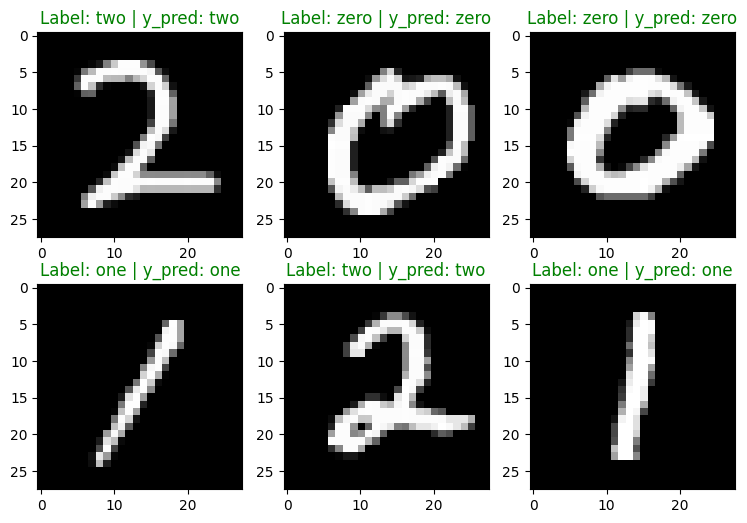

In [17]:
import random
import matplotlib.pyplot as plt

_, axs = plt.subplots(2, 3, figsize=(9, 6))
y_labels, y_pred_results = [], []

for i, (image, label) in enumerate(random.sample(list(test_dataset), k=6)):
    model.eval()
    with torch.inference_mode():
        image = image.to(device)
        y_pred = model(image.unsqueeze(dim=0)).softmax(dim=-1).argmax(dim=-1).cpu().item()
        x = i // 3
        y = i % 3
        axs[x, y].imshow(image.cpu().squeeze(), cmap="gray")
        if y_pred == label:
            axs[x, y].set_title(f"Label: {class_labels[label]} | y_pred: {class_labels[label]}", c="green")
        else:
            axs[x, y].set_title(f"Label: {class_labels[label]} | y_pred: {class_labels[label]}", c="red")
    y_pred_results.append(y_pred)
    y_labels.append(label)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

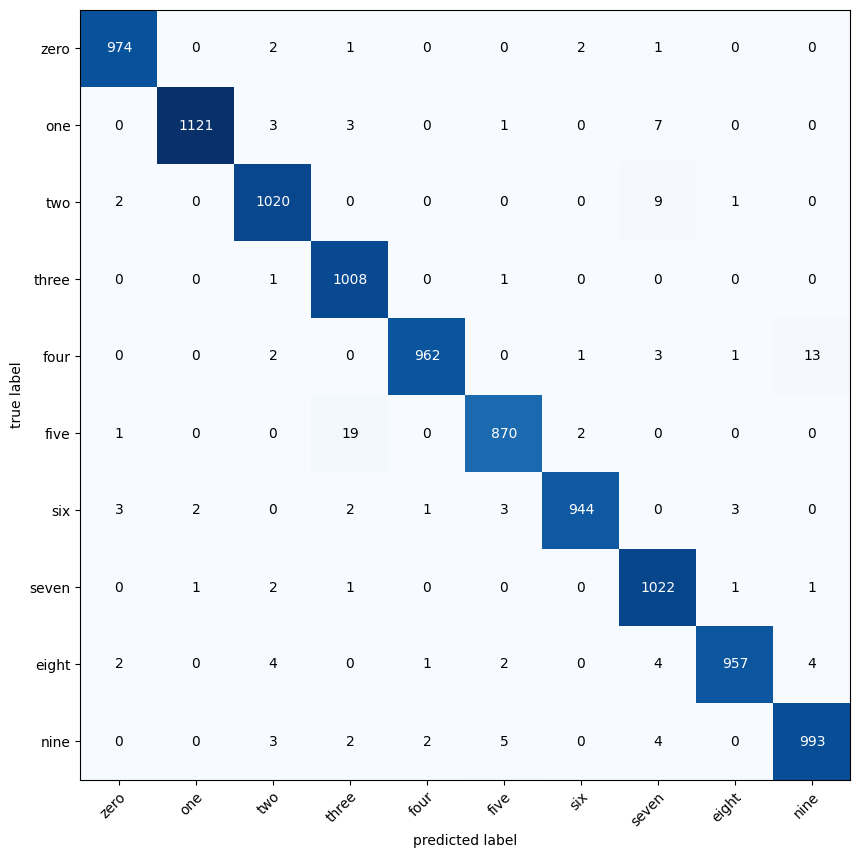

In [23]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
import random

y_labels, y_pred_results = [], []

for i, (image, label) in enumerate(random.sample(list(test_dataset), k=10000)):
    model.eval()
    with torch.inference_mode():
        image = image.to(device)
        y_pred = model(image.unsqueeze(dim=0)).softmax(dim=-1).argmax(dim=-1).cpu().item()
        x = i // 3
        y = i % 3
    y_pred_results.append(y_pred)
    y_labels.append(label)

conf_mat = ConfusionMatrix(task='multiclass', num_classes=len(class_labels))
conf_mat_result = conf_mat(preds=torch.Tensor(y_pred_results),
                           target=torch.Tensor(y_labels))

fig, axs = plot_confusion_matrix(conf_mat=conf_mat_result.numpy(),
                                 figsize=(10, 10),
                                 class_names=class_labels)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?